_todo: write your own code to implement the k-means algorithm.  Make plots of the various steps the algorithm takes so you can "see" the algorithm working.  Test your algorithm on either the Iris or PalmerPenguins datasets.  Compare your results to the built-in `kmeans` function in R or Python._

In [1]:
import numpy as np



In [2]:
def initialize_centroids(X, k):
    """
    Randomly initialize k centroids from the dataset X.
    """
    np.random.seed(42)

    # Randomly choose k data points from the dataset as initial centroids
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)

    # Creates array of data points that are the initial centroids
    centroids = X[random_indices, :]
    return centroids

In [3]:
def compute_distances(X, centroids):
    """
    Compute the distance from each point in X to each centroid.
    """
    # Create a matrix of distances between each data point and each centroid
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

In [4]:
def assign_clusters(distances):
    """
    Assign each point to the nearest centroid.
    """
    return np.argmin(distances, axis=1)

In [5]:
def update_centroids(X, labels, k):
    """
    Update the centroids by calculating the mean of the points assigned to each centroid.
    """
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i, :] = X[labels == i].mean(axis=0)
    return new_centroids

In [6]:
def k_means(X, k, max_iters=100, tol=1e-4):
    """
    The main function to run the k-means algorithm.
    """
    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        # Step 2: Compute distances and assign clusters
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        
        # Step 3: Update centroids
        new_centroids = update_centroids(X, labels, k)
        
        # Step 4: Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    
    return centroids, labels

In [13]:
# load iris dataset
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data

df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Run k-means algorithm

k_means(X, k=3)

(array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]))

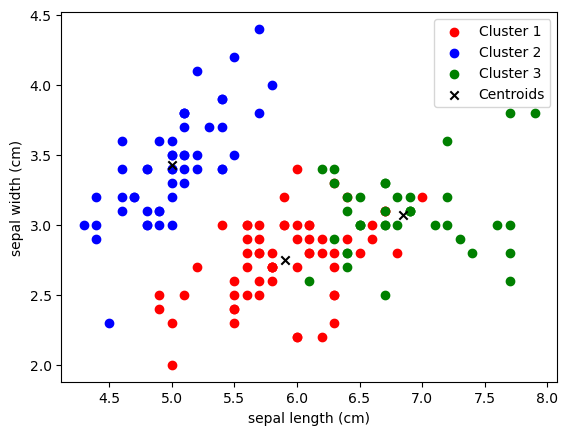

In [57]:
# plot k-means results with centroids and color coded clusters

import matplotlib.pyplot as plt

centroids, labels = k_means(X, k=3)

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='blue', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], color='green', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

In [59]:
# run k means python function

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

kmeans_centroids = kmeans.cluster_centers_

kmeans_labels = kmeans.labels_

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


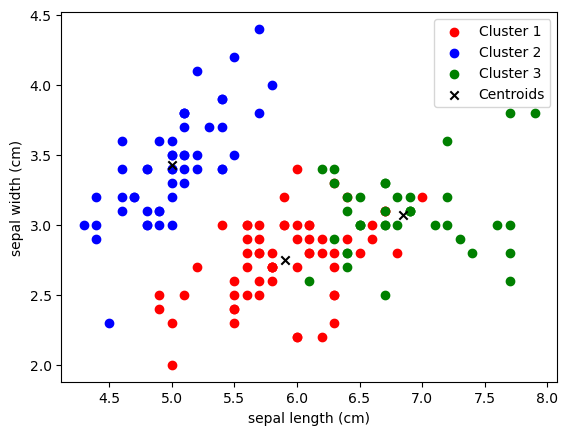

In [60]:
# plot k-means results with centroids and color coded clusters

plt.scatter(X[kmeans_labels == 0, 0], X[kmeans_labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[kmeans_labels == 1, 0], X[kmeans_labels == 1, 1], color='blue', label='Cluster 2')
plt.scatter(X[kmeans_labels == 2, 0], X[kmeans_labels == 2, 1], color='green', label='Cluster 3')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], color='black', marker='x', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

In [ ]:
# Compare results from self-made k-means and sklearn's k-means


np.allclose(k_means(X, k=3)[0], kmeans.cluster_centers_)

np.allclose(k_means(X, k=3)[1], kmeans.labels_)



In [32]:
# Initialize centroid

init_cent = initialize_centroids(X[:,[0,1]], k=2)[:,[0,1]]

init_cent

array([[6.1, 2.8],
       [5.7, 3.8]])

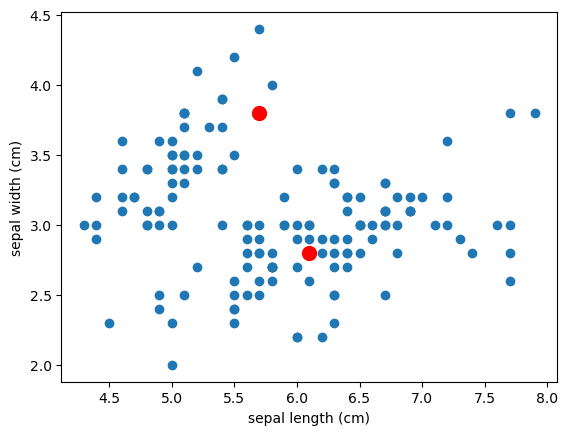

In [33]:
# create scatter plot of X with column 1 on x-axis and column 2 on y-axis

# add init_cent to the plot and color them differently and make them larger than the normal points

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(init_cent[:, 0], init_cent[:, 1], s=100, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [52]:
comp_dist = compute_distances(X[:,[0,1]], init_cent)

comp_dist = pd.DataFrame(comp_dist, columns=['centroid_1', 'centroid_2'])

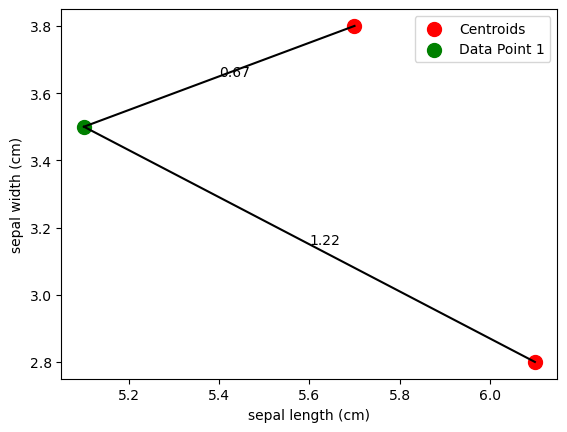

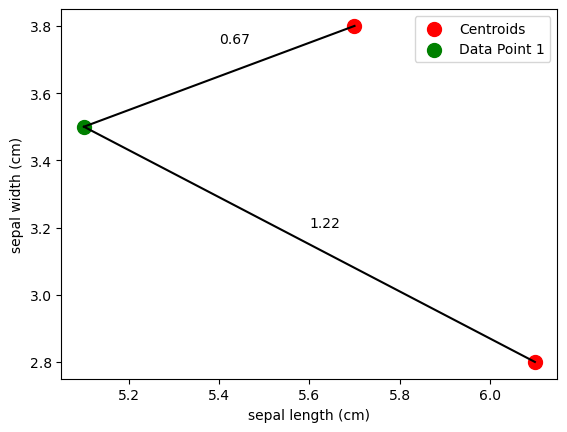

In [48]:


# Next to each line, add the distance between the centroid and the data point

plt.scatter(init_cent[:, 0], init_cent[:, 1], s=100, c='red')
plt.scatter(X[0, 0], X[0, 1], s=100, c='green')
plt.plot([init_cent[0, 0], X[0, 0]], [init_cent[0, 1], X[0, 1]], c='black')
plt.plot([init_cent[1, 0], X[0, 0]], [init_cent[1, 1], X[0, 1]], c='black')
plt.text((init_cent[0, 0] + X[0, 0]) / 2, (init_cent[0, 1] + X[0, 1]) / 2, f'{comp_dist[0,0]:.2f}', c='black')
plt.text((init_cent[1, 0] + X[0, 0]) / 2, (init_cent[1, 1] + X[0, 1]) / 2, f'{comp_dist[0,1]:.2f}', c='black')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(['Centroids','Data Point 1'])
plt.show()

# move the text up so its not on the line itself

plt.scatter(init_cent[:, 0], init_cent[:, 1], s=100, c='red')
plt.scatter(X[0, 0], X[0, 1], s=100, c='green')
plt.plot([init_cent[0, 0], X[0, 0]], [init_cent[0, 1], X[0, 1]], c='black')
plt.plot([init_cent[1, 0], X[0, 0]], [init_cent[1, 1], X[0, 1]], c='black')
plt.text((init_cent[0, 0] + X[0, 0]) / 2, (init_cent[0, 1] + X[0, 1]) / 2 + 0.05, f'{comp_dist[0,0]:.2f}', c='black')
plt.text((init_cent[1, 0] + X[0, 0]) / 2, (init_cent[1, 1] + X[0, 1]) / 2 + 0.1, f'{comp_dist[0,1]:.2f}', c='black')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(['Centroids','Data Point 1'])
plt.show()

In [53]:
cluster = assign_clusters(comp_dist)

# merge cluster and comp_dist into one dataframe

comp_dist['cluster'] = cluster

comp_dist

,centroid_1,centroid_2,cluster
0,1.220656,0.670820,1
1,1.216553,1.131371,1
2,1.456022,1.166190,1
3,1.529706,1.303840,1
4,1.360147,0.728011,1
...,...,...,...
145,0.632456,1.280625,0
146,0.360555,1.431782,0
147,0.447214,1.131371,0
148,0.608276,0.640312,0


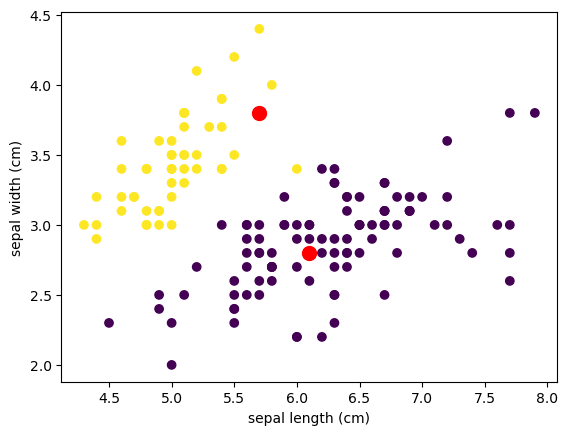

In [54]:
# plot the data points and the centroids, color the data points according to the cluster they belong to

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.scatter(init_cent[:, 0], init_cent[:, 1], s=100, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


In [55]:
update_centroids(X[:,[0,1]], cluster, k=2)

array([[6.247, 2.861],
       [5.036, 3.45 ]])

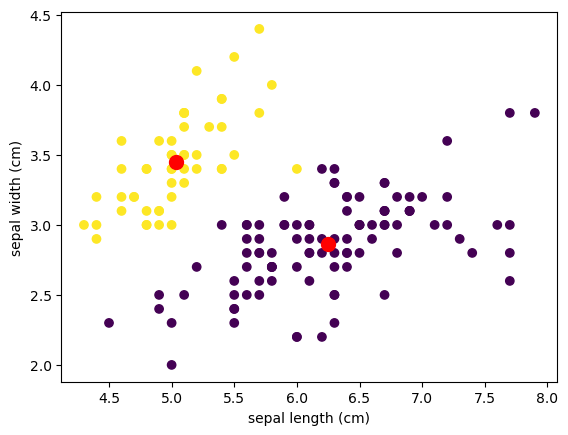

In [56]:
# Plot the data points and the updated centroids

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.scatter(update_centroids(X[:,[0,1]], cluster, k=2)[:, 0], update_centroids(X[:,[0,1]], cluster, k=2)[:, 1], s=100, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()